## PCA

In [1]:
import numpy as np
import os
from random import randrange
from PIL import Image

In [2]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=10,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
Shape of X_Flat: (3072, 672)
Variance in the First 2 Dimenstions  (47.37008165464738+1.1700637303300449e-31j)
Variance in the First 10 Dimenstions  (63.07875724490691+1.5580755495556167e-31j)
Variance in the First 50 Dimenstions  (81.32733037366677+2.0088240558365334e-31j)
Variance in the First 100 Dimenstions  (88.70296912173211+2.1910058694556263e-31j)
Variance in the First 200 Dimenstions  (94.97827172132632+2.346008852607774e-31j)
Variance in the First 300 Dimenstions  (97.68587032116484+2.4128878362890846e-31j)


/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


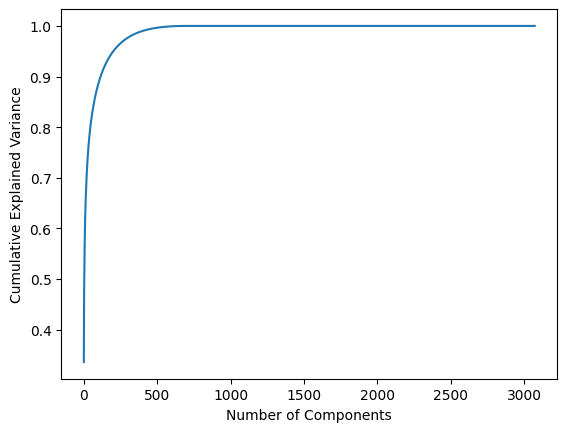

In [3]:
dirpath = './SMAI-Dataset-release/IIIT-CFW/'
X,y = load_data(dirpath)

# Here X is the dataset -> 672, 32, 32, 3
# Y is the corresponding data labels -> 672

# Perform PCA on the dataset
# Flatten the dataset's last three dimensions
X_Flat = X.reshape(X.shape[0],-1)
X_Flat = X_Flat.T

# # Find the Mean for each column, and subtract it from the corresponding column
X_mean = np.mean(X_Flat,axis=1)
X_mean = X_mean.reshape(X_mean.shape[0],1)
X_Flat = X_Flat - X_mean
print("Shape of X_Flat:",X_Flat.shape)

# # Find the eigen vectors for the covariance matrix
cov = np.cov(X_Flat)
eig_val,eig_vec = np.linalg.eig(cov)

# # Sort the eigen vectors in descending order of eigen values
idx = eig_val.argsort()[::-1]
eig_val = eig_val[idx]
eig_vec = eig_vec[:,idx]

# Remove the imaginary part of the eigen vectors
eig_vec = eig_vec.real

# print("Eigen Vector Shape",eig_vec.shape)

# # Find the top k eigen vectors
eig_val_sum = np.sum(eig_val)
eig_val = eig_val/eig_val_sum

# # Find the Cummulative Sum
eig_val = np.cumsum(eig_val)

# Plot the Cummulative Sum
plt.plot(eig_val)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Find the Values of the Percentege of Variance Explained

print("Variance in the First 2 Dimenstions ",eig_val[2]*100)
print("Variance in the First 10 Dimenstions ",eig_val[10]*100)
print("Variance in the First 50 Dimenstions ",eig_val[50]*100)
print("Variance in the First 100 Dimenstions ",eig_val[100]*100)
print("Variance in the First 200 Dimenstions ",eig_val[200]*100)
print("Variance in the First 300 Dimenstions ",eig_val[300]*100)


PCA Accuracy: 0.3333333333333333
Original Accuracy: 0.3333333333333333


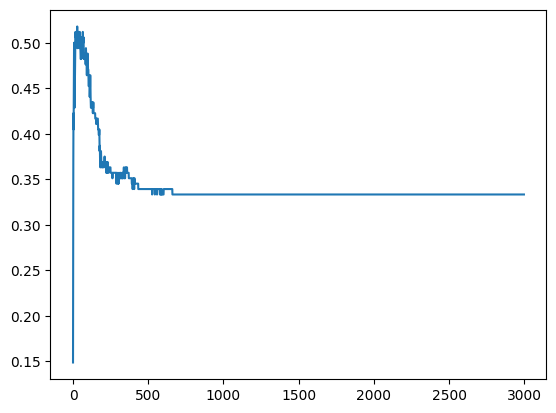

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
# Find the Accuracy of the model, F1 Score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score

PCA_Acc = []

for i in range(1, 3000):
    eig_temp = eig_vec[:,0:i]
    eig_temp = eig_temp.T
    X_PCA_temp = np.dot(eig_temp,X_Flat)
    X_PCA_temp = X_PCA_temp.T
    X_train, X_test, y_train, y_test = train_test_split(X_PCA_temp, y, test_size=0.25, random_state=42)

    # Create the KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)

    # Predict the test data
    y_pred = knn.predict(X_test)
    PCA_Acc.append(accuracy_score(y_test,y_pred))

plt.plot(PCA_Acc)

# Create the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

# Predict the test data
y_pred = knn.predict(X_test)
PCA_Acc = accuracy_score(y_test,y_pred)

# Do the Same for the Original X_Flat
X_train, X_test, y_train, y_test = train_test_split(X_Flat.T, y, test_size=0.25, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
Original_Acc = accuracy_score(y_test,y_pred)

print("PCA Accuracy:",PCA_Acc)
print("Original Accuracy:",Original_Acc)


## 1.2 : Drawer

Drawer Attributes Shape: (100, 9)
Guesser Attributes Shape: (100, 7)
(9, 100)


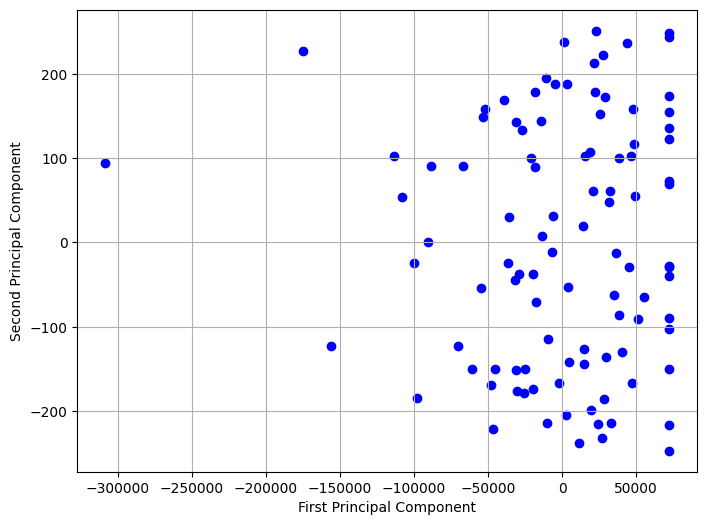

In [5]:
# Load the CSV Files
import pandas as pd

# Load the CSV Files
drawer_attributes = pd.read_csv('./drawer_attributes.csv')
guesser_attributes = pd.read_csv('./guesser_attributes.csv')

# Convert these data frames to numpy arrays
drawer_attributes = np.array(drawer_attributes.values)
guesser_attributes = np.array(guesser_attributes.values)

print("Drawer Attributes Shape:",drawer_attributes.shape)
print("Guesser Attributes Shape:",guesser_attributes.shape)

# Perform PCA for Drawer Attributes
drawer_attributes = drawer_attributes.T
drawer_attributes_mean = np.mean(drawer_attributes,axis=1)
drawer_attributes_mean = drawer_attributes_mean.reshape(drawer_attributes_mean.shape[0],1)
drawer_attributes = drawer_attributes - drawer_attributes_mean

# Find the covariance matrix
cov = np.cov(drawer_attributes)
eig_val,eig_vec = np.linalg.eig(cov)

# Sort the eigen vectors in descending order of eigen values
idx = eig_val.argsort()[::-1]
eig_val = eig_val[idx]
eig_vec = eig_vec[:,idx]

# Remove the imaginary part of the eigen vectors
eig_vec = eig_vec.real

print(drawer_attributes.shape)
x1 = np.dot(np.expand_dims(eig_vec[:, 0], axis=1).T, drawer_attributes)
x2 = np.dot(np.expand_dims(eig_vec[:, 1], axis=1).T, drawer_attributes)
x3 = np.dot(np.expand_dims(eig_vec[:, 2], axis=1).T, drawer_attributes)

plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c='blue')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()


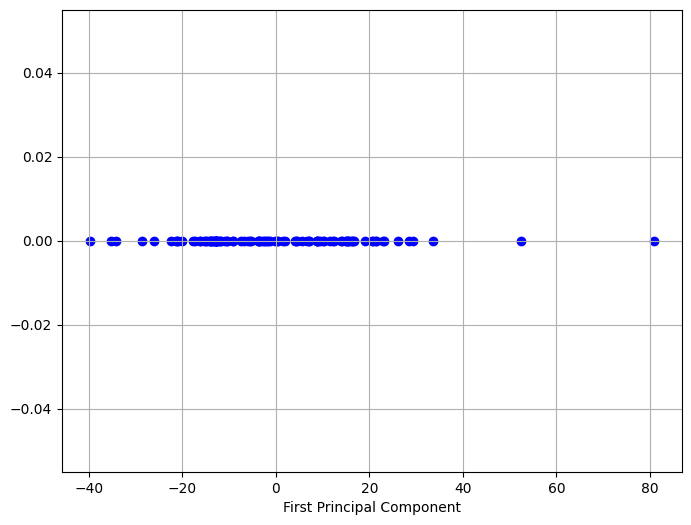

In [14]:
# Add a Figure
plt.figure(figsize=(8, 6))
plt.scatter(x3.T, np.zeros(x1.T.shape), c='blue')
plt.xlabel('First Principal Component')
plt.grid(True)
plt.show()

# Here we can see that the outliers are clearly visible


## Guesser

(7, 100)


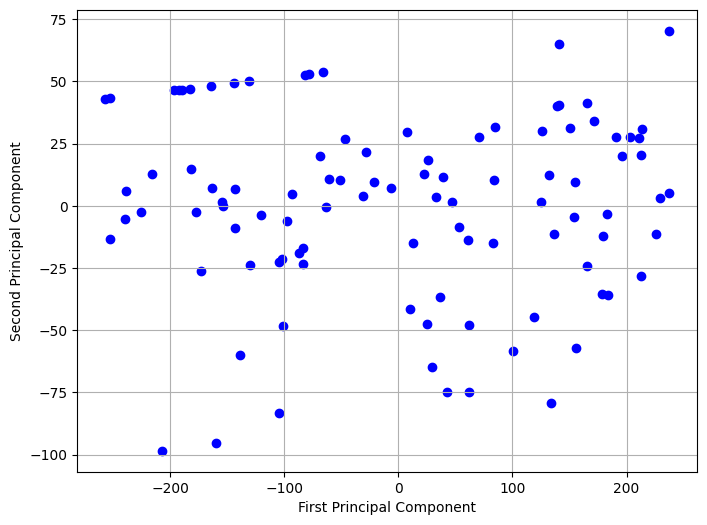

In [6]:
# Repeat the Same thing for guesser

guesser_attributes = guesser_attributes.T
guesser_attributes_mean = np.mean(guesser_attributes,axis=1)
guesser_attributes_mean = guesser_attributes_mean.reshape(guesser_attributes_mean.shape[0],1)
guesser_attributes = guesser_attributes - guesser_attributes_mean

# Find the covariance matrix
cov = np.cov(guesser_attributes)
eig_val,eig_vec = np.linalg.eig(cov)

# Sort the eigen vectors in descending order of eigen values
idx = eig_val.argsort()[::-1]
eig_val = eig_val[idx]
eig_vec = eig_vec[:,idx]

# Remove the imaginary part of the eigen vectors
eig_vec = eig_vec.real

print(guesser_attributes.shape)
x1 = np.dot(np.expand_dims(eig_vec[:, 0], axis=1).T, guesser_attributes)
x2 = np.dot(np.expand_dims(eig_vec[:, 1], axis=1).T, guesser_attributes)
x3 = np.dot(np.expand_dims(eig_vec[:, 2], axis=1).T, guesser_attributes)

plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c='blue')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

## Physical Significance of The PCA

